# Disciplina de Classificação e Pesquisa de Dados

### Implementação (em Python) dos principais algoritmos de Classificação por Inserção.

A seguir você encontra uma versão do algoritmo de inserção direta com busca linear, que conta a quantidade de trocas e comparações realizadas para ordenar o array passado.

Também encontra um algoritmo de inserção direta com busca binária, que chama uma função auxiliar (incompleta) que faz a busca. Uma de suas atividades do laboratório de hoje é implementar essa função. Não esqueça que as operações de comparação e troca executadas por ela também devem ser consideradas.

Finalmente, encontra a função shellsort (incompleta). Você deve implementar essa função, considerando o que estudamos em aula. Utilize qualquer sequência de intervalos, iniciando pelo maior (mas menor que a quantidade de elementos no array) e diminuindo até que o intervalo seja 1. Não se esqueça de contar a quantidade de comparações e trocas.

In [39]:
# Bibliotecas necessárias ao script:
import numpy as np  # importa a biblioteca numpy (que trabalha com arrays numéricos)
import time         # importa a biblioteca utilizada para contar o tempo
import pandas as pd # biblioteca para trabalhar com data frames
import math

################################################
# Algoritmos de ordenação
################################################

# Função de Inserção Direta com Busca Linear
def insertion_sort(array): 
    trocas = comparacoes = 0
    for i in range(1, len(array)):             # do segundo ao último (o primeiro faz parte do subarray ordenado)
        chave = array[i]                       # chave a inserir no subarray ordenado
        j = i-1                                # último elemento do subarray ordenado         
        while (j >= 0) and (array[j] > chave): # busca linear da direita para a esquerda no subarray ordenado            
            comparacoes = comparacoes + 1
            array[j+1] = array[j]
            j = j -1
            trocas = trocas + 1
        array[j+1] = chave
        trocas = trocas + 1
    # retorna quantidade de operações
    return {'trocas':trocas, 'comparacoes':comparacoes}                         

def insertion_sortBB(array):  
    log_operacoes = { 'comparacoes': 0, 'trocas': 0 }
    
    for i in range(1, len(array)): 
        resultado = busca_binaria(array, array[i], 0, i-1, log_operacoes)

        if resultado['posicao'] < i:
            tmp = array[i]
            for j in reversed(range(resultado['posicao'], i)):
                array[j+1] = array[j]
                log_operacoes['trocas'] = log_operacoes['trocas'] + 1
            array[resultado['posicao']] = tmp            
            log_operacoes['trocas'] = log_operacoes['trocas'] + 1
        
    return log_operacoes

################################################
# Implementação dos seus algoritmos:

# Faz busca binária do 'elemento' no 'array', entre os índices 'inicio' e 'fim':
def busca_binaria(array, elemento, inicio, fim, log_operacoes):
    meio = 0

    while inicio <= fim:
        meio = (fim + inicio) // 2
        log_operacoes['comparacoes'] = log_operacoes['comparacoes'] + 1

        # Se elemento maior, ignora metade esquerda
        if array[meio] < elemento:
            inicio = meio + 1

        # Se menor, ignora metade direita
        elif array[meio] > elemento:
            fim = meio - 1

        # Se elemento for o meio
        else:
            return {'posicao': meio, 'log_operacoes': log_operacoes }

    # Senão, elemento ausente no array
    return {'posicao': -1, 'log_operacoes': log_operacoes }

def shellsort(array): 
    trocas = comparacoes = 0
    
    # Começa com partições grandes, depois reduz
    tamanho = len(array)
    h = tamanho // 2

    # Faz uma inserção direta nessa partição
    # Quando os elementos da primeira partição array[0...h-1]
    # estiverem em ordem, continua adicionando mais elementos
    # até que todo o array esteja ordenado

    while h > 0:
        for i in range(h,tamanho):
            # Adiciona array[i] aos elementos que já foram
            # ordenados na partição, e salva ele em temp,
            # deixando a posição i vazia
            temp = array[i]

            # Movimenta os demais elementos já ordenados da
            # partição, até achar a posição correta pra array[i]
            j = i
            comparacoes = comparacoes + 1
            while j >= h and array[j-h] > temp:
                comparacoes = comparacoes + 1
                array[j] = array[j-h]
                j -= h
                trocas = trocas + 1

            # Coloca temp na posição correta
            array[j] = temp
        h //= 2

    # retorna quantidade de operações    
    return {'trocas':trocas, 'comparacoes':comparacoes}                     
    

In [40]:
# Avaliação do desempenho de diferentes algoritmos para diferentes quantidades de números

# Variáveis globais necessárias:
gerador = np.random.RandomState()  # cria um gerador de números aleatórios (descomente se for usar array aleatório)
medicoes = []                      # lista que armazena os resultados das medições em memória

# lista de algoritmos a testar (insira o seu, caso elabore outros):
algoritmos = { 
    'ISBL': { 'nome': 'Inserção Direta com Busca Linear', 'funcao': insertion_sort },
    'ISBB': { 'nome': 'Inserção Direta com Busca Binária', 'funcao': insertion_sortBB },
    'ISSH': { 'nome': 'Inserção por ShellSort', 'funcao': shellsort },
}  

# testa o desempenho dos algoritmos para diferentes quantidades (múltiplos de 10):
for qtd in [10**x for x in range(2, 5)]:
    max = qtd
    array = gerador.randint(0, max+1, qtd)          # gera array aleatório com 'qtd' números entre 0 e 'max'    
    array = list(range(qtd, 0, -1))                   # array decrescente (pior caso)
    
    print('---------------------------------------------------')
    print('Testando algoritmos com array de tamanho ', qtd)
    print('---------------------------------------------------')
    
    print('Array gerado (', qtd, 'numeros ):\n' , array, '\n') 
    
    for algoritmo in algoritmos:                       # itera sobre cada um dos algoritmos enunciados anteriormente
        print('=> Avaliando ordenação por "', algoritmos[algoritmo]['nome'], '"...')
        
        array_tmp = array.copy()                       # faz cópia do array para não perder
        
        tempo = time.process_time()                     # armazena o tempo de início do processamento
        m = algoritmos[algoritmo]['funcao'](array_tmp ) # aplica algorimo e retorna quantidade de trocas e comparações em 'm'
        t = time.process_time() - tempo                 # verifica o tempo de fim de processamento e calcula a diferença
        print('\nArray ordenado:\n', array_tmp, '\n')
        
        # armazena informações sobre a execução do algoritmo em um dicionário:
        medicao = {}
        medicao['algoritmo']=algoritmo
        medicao['tipo']='R'
        medicao['quantidade']=qtd
        medicao['trocas']=m['trocas']
        medicao['comparacoes']=m['comparacoes']
        medicao['tempo']=t
        
        medicoes.append(medicao)                              # adiciona medição em uma lista de medições

print('Fim do processamento!')

 6672, 6673, 6674, 6675, 6676, 6677, 6678, 6679, 6680, 6681, 6682, 6683, 6684, 6685, 6686, 6687, 6688, 6689, 6690, 6691, 6692, 6693, 6694, 6695, 6696, 6697, 6698, 6699, 6700, 6701, 6702, 6703, 6704, 6705, 6706, 6707, 6708, 6709, 6710, 6711, 6712, 6713, 6714, 6715, 6716, 6717, 6718, 6719, 6720, 6721, 6722, 6723, 6724, 6725, 6726, 6727, 6728, 6729, 6730, 6731, 6732, 6733, 6734, 6735, 6736, 6737, 6738, 6739, 6740, 6741, 6742, 6743, 6744, 6745, 6746, 6747, 6748, 6749, 6750, 6751, 6752, 6753, 6754, 6755, 6756, 6757, 6758, 6759, 6760, 6761, 6762, 6763, 6764, 6765, 6766, 6767, 6768, 6769, 6770, 6771, 6772, 6773, 6774, 6775, 6776, 6777, 6778, 6779, 6780, 6781, 6782, 6783, 6784, 6785, 6786, 6787, 6788, 6789, 6790, 6791, 6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799, 6800, 6801, 6802, 6803, 6804, 6805, 6806, 6807, 6808, 6809, 6810, 6811, 6812, 6813, 6814, 6815, 6816, 6817, 6818, 6819, 6820, 6821, 6822, 6823, 6824, 6825, 6826, 6827, 6828, 6829, 6830, 6831, 6832, 6833, 6834, 6835, 6836, 6837, 683

In [41]:
# Cria dataframe pandas (i.e., uma tabela) que organiza os dados relacionados com a execução dos algorimos acima
df = pd.DataFrame(medicoes)
cols = ['algoritmo', 'tipo', 'quantidade', 'trocas', 'comparacoes', 'tempo']  # ordem correta das colunas 
df = df[cols]

print(df) # imprime os dados de execução dos algoritmos

  algoritmo tipo  quantidade    trocas  comparacoes      tempo
0      ISBL    R         100      5049         4950   0.000000
1      ISBB    R         100      5148          481   0.000000
2      ISSH    R         100       260          763   0.000000
3      ISBL    R        1000    500499       499500   0.343750
4      ISBB    R        1000    501498         7988   0.171875
5      ISSH    R        1000      4700        12706   0.015625
6      ISBL    R       10000  50004999     49995000  24.625000
7      ISBB    R       10000  50014998       113632  15.468750
8      ISSH    R       10000     62560       182565   0.078125


In [42]:
# agrupa resultados por algoritmo:
df_by_algorithm = df.groupby(['algoritmo']) 

for key, item in df_by_algorithm:
    print(df_by_algorithm.get_group(key), "\n\n")

  algoritmo tipo  quantidade    trocas  comparacoes      tempo
1      ISBB    R         100      5148          481   0.000000
4      ISBB    R        1000    501498         7988   0.171875
7      ISBB    R       10000  50014998       113632  15.468750 


  algoritmo tipo  quantidade    trocas  comparacoes     tempo
0      ISBL    R         100      5049         4950   0.00000
3      ISBL    R        1000    500499       499500   0.34375
6      ISBL    R       10000  50004999     49995000  24.62500 


  algoritmo tipo  quantidade  trocas  comparacoes     tempo
2      ISSH    R         100     260          763  0.000000
5      ISSH    R        1000    4700        12706  0.015625
8      ISSH    R       10000   62560       182565  0.078125 




In [43]:
# seleciona somente sigla e tempo:
tmp = df[['algoritmo','quantidade','tempo']]
tmp = tmp.groupby(['algoritmo']) 
for key, item in df_by_algorithm:
    print(df_by_algorithm.get_group(key), "\n\n")

  algoritmo tipo  quantidade    trocas  comparacoes      tempo
1      ISBB    R         100      5148          481   0.000000
4      ISBB    R        1000    501498         7988   0.171875
7      ISBB    R       10000  50014998       113632  15.468750 


  algoritmo tipo  quantidade    trocas  comparacoes     tempo
0      ISBL    R         100      5049         4950   0.00000
3      ISBL    R        1000    500499       499500   0.34375
6      ISBL    R       10000  50004999     49995000  24.62500 


  algoritmo tipo  quantidade  trocas  comparacoes     tempo
2      ISSH    R         100     260          763  0.000000
5      ISSH    R        1000    4700        12706  0.015625
8      ISSH    R       10000   62560       182565  0.078125 




Text(0, 0.5, 'tempo')

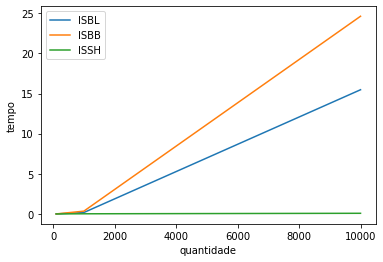

In [44]:
# plota gráficos dos dados gerados

# habilita a geração de gráficos direto nas células do Jupyter:
%matplotlib inline 

#importa biblioteca de geração e manipulação de gráficos
import matplotlib.pyplot as plt

tmp.plot(x='quantidade', y='tempo', ax=plt.gca())
plt.legend(df['algoritmo'].unique())
plt.ylabel('tempo')